# 基于多种聚类算法实现鸢尾花聚类
## 1、用1个小例子来体验聚类

In [1]:
import numpy as np
from sklearn.cluster import Birch # Birch聚类是一种层次聚类算法

a = np.random.randint(0, 10, 3) # 0~10之间机选3个数
b = np.random.randint(20, 30, 3) # 20~30之间机选3个数
c = np.random.randint(40, 50, 3) # 40~50之间机选3个数
data = np.concatenate((a, b, c)) # 合并成一个数组
print(data) # 输出样本数据

# 创建Birch聚类模型，拟合数据
# 因为模型要求的样本数据是二维数组，所以reshape（变形）一下。
model = Birch().fit(data.reshape(-1, 1)) 

target = model.labels_ # labels_属性保存聚类结果（用数字表示每个样本的类别）
print(target) # 输出聚类结果

# 根据类别分别显示样本数据
k = len(np.unique(target)) # 得到类别的数量
print('\n聚类结果:')
for i in range(k):
    print(data[target==i])

[ 0  0  3 24 25 25 46 45 47]
[0 0 0 2 2 2 1 1 1]

聚类结果:
[0 0 3]
[46 45 47]
[24 25 25]


## 2、K-均值聚类（K-Means）实现上面的例子

In [2]:
import numpy as np
from sklearn.cluster import KMeans # 引入K-Means聚类模型

a = np.random.randint(0, 10, 3) # 0~10之间机选3个数
b = np.random.randint(20, 30, 3) # 20~30之间机选3个数
c = np.random.randint(40, 50, 3) # 40~50之间机选3个数
data = np.concatenate((a, b, c)) # 合并成一个数组
print(data) # 输出样本数据

k = 3 # K-Means聚类需要事先指定聚类数量K
model = KMeans(k).fit(data.reshape(-1, 1)) 

target = model.labels_ # labels_属性保存聚类结果（用数字表示每个样本的类别）
print(target) # 输出聚类结果

# 根据类别分别显示样本数据
print('\n聚类结果:')
for i in range(k):
    print(data[target==i])
    

[ 6  5  1 26 28 28 40 41 47]
[0 0 0 2 2 2 1 1 1]

聚类结果:
[6 5 1]
[40 41 47]
[26 28 28]


## 3、层次聚类Birch案例

## 3.1 生成数据

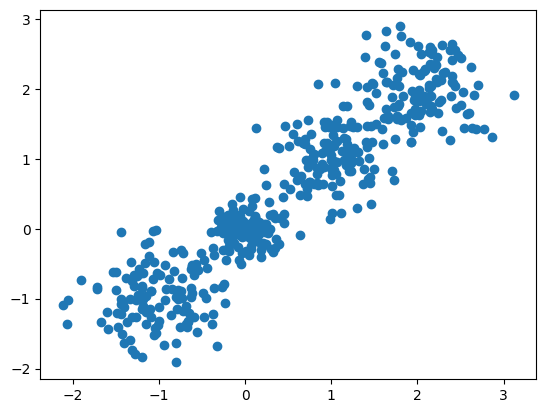

In [3]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

# 使用数据生成器随机生成500个样本，每个样本2个特征
# 共4个类簇，中心分别是[-1,-1], [0,0],[1,1], [2,2]
# 簇的标准差分别是[0.4, 0.3, 0.4, 0.3]（决定簇的离散程度）
X, y = make_blobs(n_samples=500, n_features=2, 
                  centers=[[-1,-1], [0,0], [1,1], [2,2]], 
                  cluster_std=[0.4, 0.2, 0.3, 0.4], 
                  random_state =9)
# 画出散点图
plt.scatter(X[:, 0], X[:, 1], marker='o')
plt.show()

### 3.2 使用Birch算法进行聚类

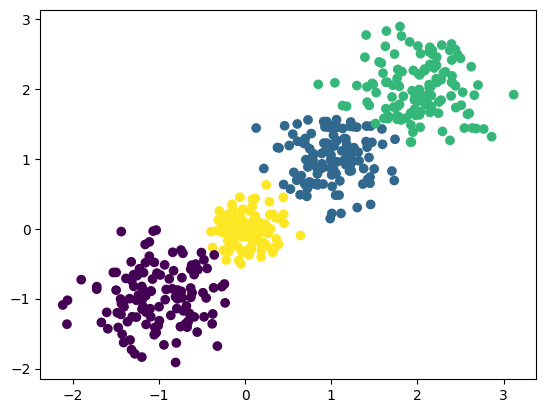

In [4]:
# Birch算法可以不指定聚类数量，也可以指定（参数为n_clusters）
# y_pred = Birch().fit_predict(X)
y_pred = Birch(n_clusters=4).fit_predict(X) # 指定聚类数量

plt.scatter(X[:, 0], X[:, 1], c=y_pred)
plt.show() 
# 不指定聚类数量时，模型将数据聚成了3类
# 指定聚类数量为4，模型能够将样本分开。

## 4、鸢尾花（iris）聚类实现

### 第1步、获得花瓣特征数据

In [5]:
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans, MeanShift, Birch, DBSCAN
from sklearn.metrics import adjusted_rand_score # 聚类模型评估工具
from IPython.display import display
import matplotlib.pyplot as plt
import pandas as pd

# 加载鸢尾花数（Iris）据集
iris = load_iris() 
data = iris.data[:,2:] # 取后两列（花瓣长、宽）作为特征数据
target = iris.target # 标签数据
feature_names = iris.feature_names[2:] # 后两列的名字
df = pd.DataFrame(data, columns=feature_names)# 创建数据框
display(df) # 显示数据集

,petal length (cm),petal width (cm)
0,1.4,0.2
1,1.4,0.2
2,1.3,0.2
3,1.5,0.2
4,1.4,0.2
...,...,...
145,5.2,2.3
146,5.0,1.9
147,5.2,2.0
148,5.4,2.3


### 第2步、调用多种聚类算法，并评估成绩
#### 注意：聚类模型的评估使用sklearn.metrics.adjusted_rand_score函数
+ 参数1-实际类别标签
+ 参数2-聚类结果标签

In [6]:
# 调用聚类算法
model = KMeans(3).fit(data) # K-均值聚类
# model = MeanShift().fit(data) # 均值漂移聚类
# model = Birch().fit(data) # Birch聚类
c_target = model.labels_ # 聚类结果标签

# 使用adjusted_rand_score函数来评估聚类效果
# 参数1-实际类别标签
# 参数2-聚类结果标签
print('accuracy: ', adjusted_rand_score(target, c_target))

accuracy:  0.8856970310281228


### 第3步、使用Matplotlib将聚类结果与实际结果可视化

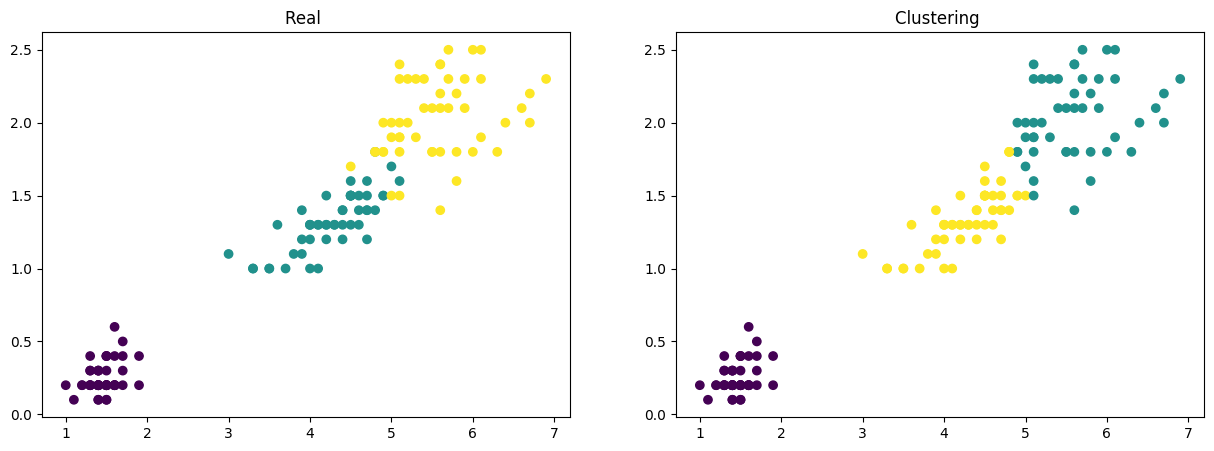

In [7]:
# 定义画板尺寸
fig = plt.figure(figsize=(15, 5))

# 画第一幅子图——实际类别标签
ax1 = fig.add_subplot(1, 2, 1)
ax1.set_title('Real ')
ax1.scatter(data[:,0], data[:,1], c=target)

# 画第二幅子图——聚类结果
ax2 = fig.add_subplot(1, 2, 2)
ax2.set_title('Clustering ')
ax2.scatter(data[:,0], data[:,1], c=c_target)

# 显示图形
plt.show() 

In [8]:
### 鸢尾花聚类案例完整代码

,petal length (cm),petal width (cm)
0,1.4,0.2
1,1.4,0.2
2,1.3,0.2
3,1.5,0.2
4,1.4,0.2
...,...,...
145,5.2,2.3
146,5.0,1.9
147,5.2,2.0
148,5.4,2.3


accuracy:  0.8856970310281228


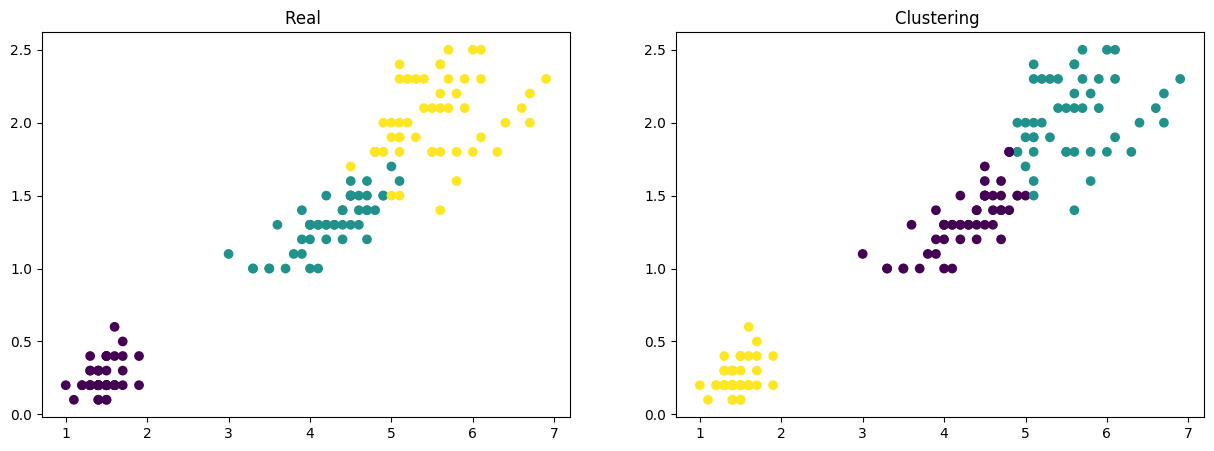

In [9]:
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans, MeanShift, Birch, DBSCAN
from sklearn.metrics import adjusted_rand_score # 聚类模型评估工具
from IPython.display import display
import matplotlib.pyplot as plt
import pandas as pd

# 加载数据集
iris = load_iris() 
data = iris.data[:,2:] # 取后两列（花瓣长、宽）作为特征数据
target = iris.target # 标签数据
feature_names = iris.feature_names[2:] # 后两列的名字
df = pd.DataFrame(data, columns=feature_names)# 创建数据框
display(df) # 显示数据集


# 调用聚类算法
model = KMeans(3).fit(data) # K-均值聚类
# model = MeanShift().fit(data) # 均值漂移聚类
# model = Birch().fit(data) # Birch聚类
c_target = model.labels_ # 聚类结果标签

# 聚类模型一般使用adjusted_rand_score函数来评估
# 参数1-实际类别标签
# 参数2-聚类结果标签
print('accuracy: ', adjusted_rand_score(target, c_target))

# 定义画板尺寸
fig = plt.figure(figsize=(15, 5))

# 画第一幅子图——实际类别标签
ax1 = fig.add_subplot(1, 2, 1)
ax1.set_title('Real ')
ax1.scatter(data[:,0], data[:,1], c=target)

# 画第二幅子图——聚类结果
ax2 = fig.add_subplot(1, 2, 2)
ax2.set_title('Clustering ')
ax2.scatter(data[:,0], data[:,1], c=c_target)

# 显示图形
plt.show() 

